In [1]:
import os
import numpy as np
from dataset import get_data,get_HOG,standardize

from matplotlib import pyplot as plt

if __name__ == '__main__':
######################## Get train/test dataset ########################
    X_train,X_test,Y_train,Y_test = get_data('dataset')
########################## Get HoG featues #############################
    H_train,H_test = get_HOG(X_train), get_HOG(X_test)
######################## standardize the HoG features ####################
    H_train,H_test = standardize(H_train), standardize(H_test)
########################################################################
######################## Implement you code here #######################
########################################################################

from sklearn.svm import SVC
import argparse
import numpy as np

e:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


*********** extract HoG features ***********


100%|██████████| 6000/6000 [00:36<00:00, 165.51it/s]


*********** extract HoG features ***********


100%|██████████| 2000/2000 [00:12<00:00, 165.95it/s]


In [2]:
C = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
Mode = ["linear", "rbf", "poly"]
for mode in Mode:
    for c in C:
        svc = SVC(kernel=mode, C=c)
        svc.fit(H_train, Y_train)
        print(mode, ", C=", c, ", Acc:", svc.score(H_test, Y_test))

linear , C= 0.001 , Acc: 0.978
linear , C= 0.01 , Acc: 0.9805
linear , C= 0.1 , Acc: 0.9805
linear , C= 1 , Acc: 0.9805
linear , C= 10.0 , Acc: 0.9805
linear , C= 100.0 , Acc: 0.9805
linear , C= 1000.0 , Acc: 0.9805
rbf , C= 0.001 , Acc: 0.885
rbf , C= 0.01 , Acc: 0.93
rbf , C= 0.1 , Acc: 0.9575
rbf , C= 1 , Acc: 0.974
rbf , C= 10.0 , Acc: 0.9735
rbf , C= 100.0 , Acc: 0.9735
rbf , C= 1000.0 , Acc: 0.9735
poly , C= 0.001 , Acc: 0.5
poly , C= 0.01 , Acc: 0.502
poly , C= 0.1 , Acc: 0.925
poly , C= 1 , Acc: 0.969
poly , C= 10.0 , Acc: 0.9735
poly , C= 100.0 , Acc: 0.9735
poly , C= 1000.0 , Acc: 0.9735


In [3]:
kernel='linear'
c=0.1

svc = SVC(kernel=kernel, C=c)
svc.fit(H_train, Y_train)


# predicted = svc.predict(H_test)
# acc=np.sum(predicted == Y_test) / len(predicted)

print(f'Acc: {svc.score(H_test, Y_test)}')

Acc: 0.9805


In [4]:
vec = svc.support_vectors_
print("Number of Support Vectors: ",len(vec))

Number of Support Vectors:  662


top 5 positive [5261 3581 3133 5926 3013]


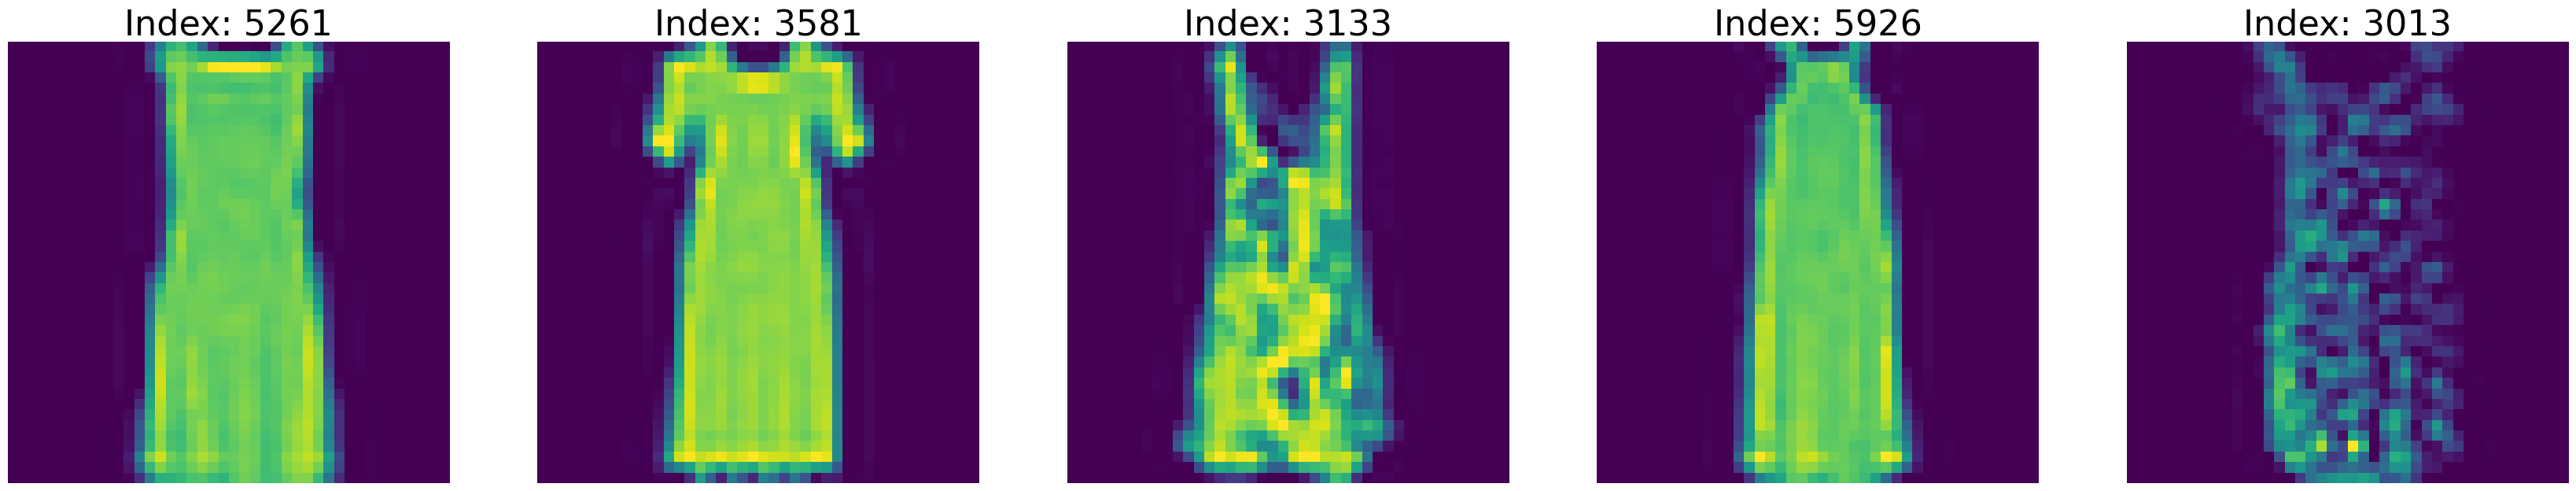

top 5 negative [2540 2248  473 2342 2747]


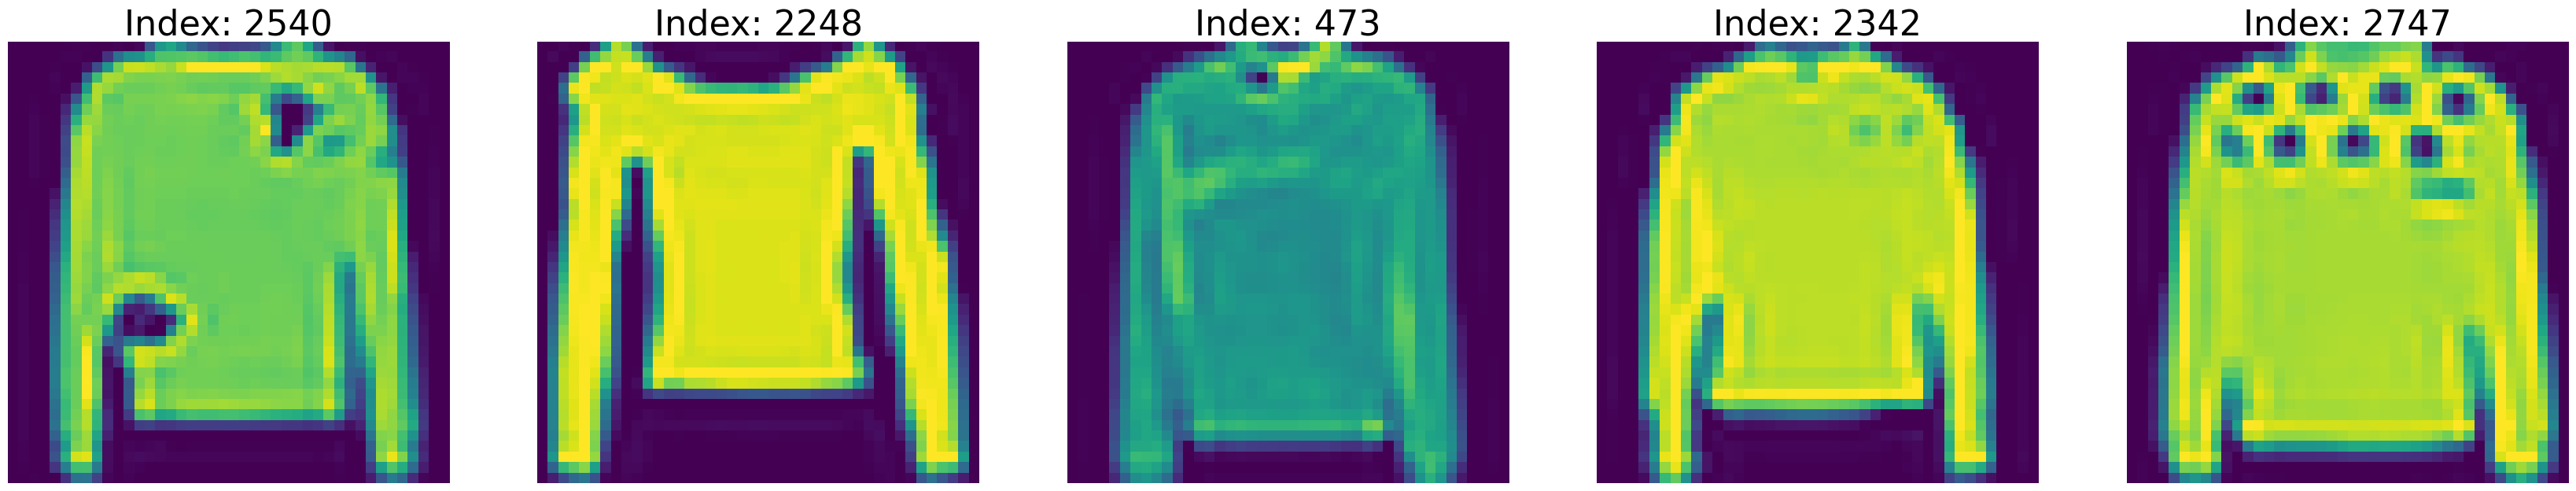

In [5]:
div_conf = svc.decision_function(H_train).reshape(-1)
pos_indices = np.argsort(div_conf)[::-1][:5]
neg_indices = np.argsort(div_conf)[:5]
print("top 5 positive",pos_indices)
figure, col = plt.subplots(nrows=1, ncols=5, figsize=(42, 42))
for i, indices in enumerate(pos_indices):
    col[i].imshow(X_train[indices])
    col[i].set_title(f'Index: {indices}', font={'size':32})
    col[i].axis('off')
plt.show()
print("top 5 negative",neg_indices)
figure, col = plt.subplots(nrows=1, ncols=5, figsize=(42, 42))
for i, indices in enumerate(neg_indices):
    col[i].imshow(X_train[indices])
    col[i].set_title(f'Index: {indices}', font={'size':32})
    col[i].axis('off')
plt.show()

5 outliers [ 2  6 13 15 31]


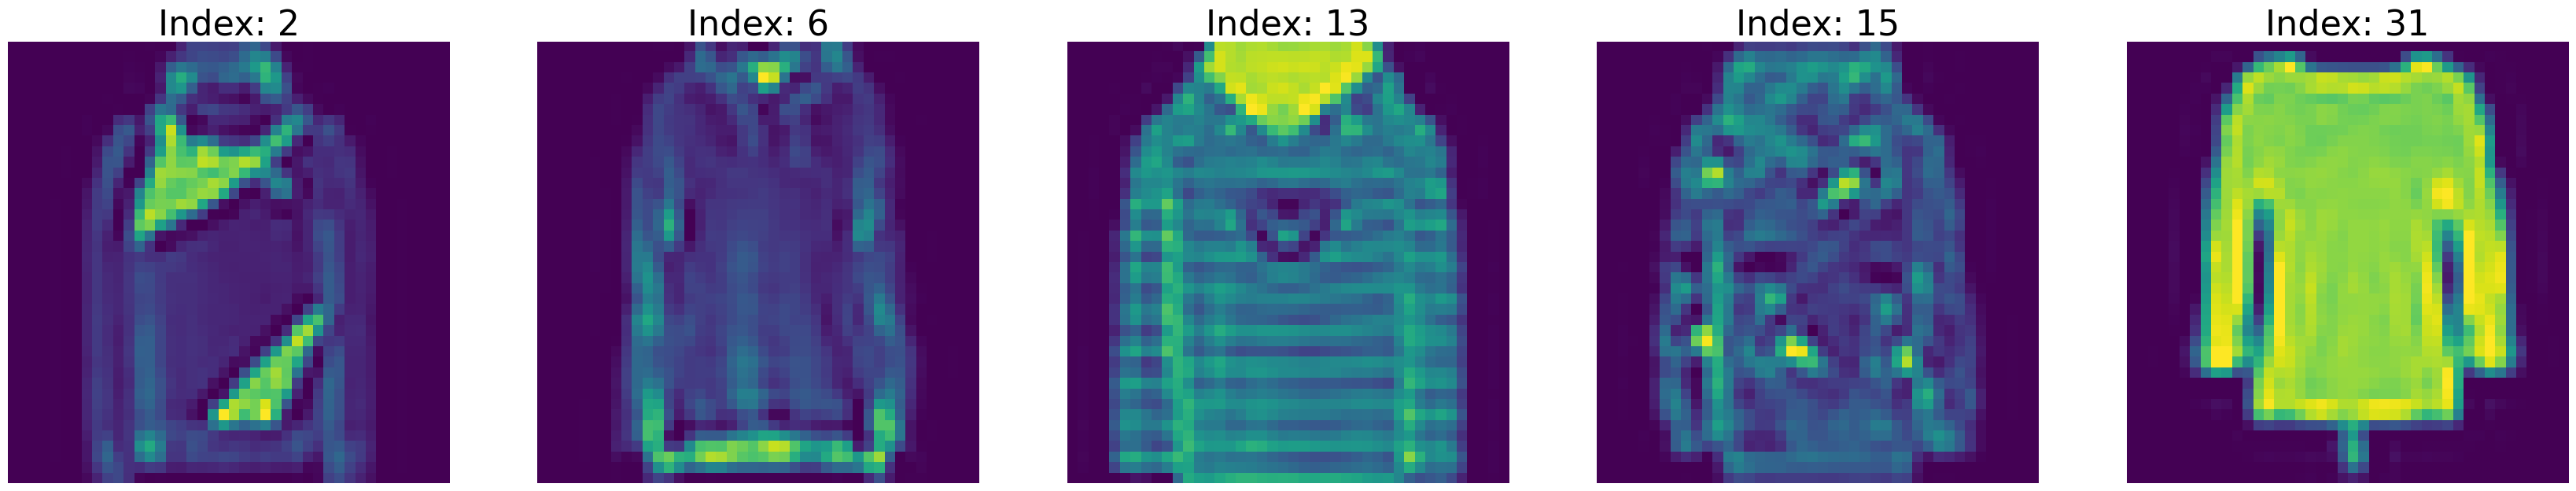

In [6]:
print("5 outliers", svc.support_[:5])
figure, col = plt.subplots(nrows=1, ncols=5, figsize=(42, 42))
for i, indices in enumerate(svc.support_[:5]):
    col[i].imshow(X_train[indices])
    col[i].set_title(f'Index: {indices}', font={'size':32})
    col[i].axis('off')
plt.show()

In [8]:
C = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
for c in C:
    svc = SVC(kernel="rbf", C=c)
    svc.fit(H_train, Y_train)
    print(f'C= {c}, Num of Support Vectors: {len(svc.support_)}')

C= 0.001, Num of Support Vectors: 6000
C= 0.01, Num of Support Vectors: 4125
C= 0.1, Num of Support Vectors: 1675
C= 1, Num of Support Vectors: 1331
C= 10.0, Num of Support Vectors: 1434
C= 100.0, Num of Support Vectors: 1434
C= 1000.0, Num of Support Vectors: 1434
